In [74]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

from yellowbrick.target import FeatureCorrelation
import plotly.express as px

In [47]:
spotify_df = pd.read_csv('/Users/anikasethi/Desktop/archive/tracks.csv')
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [64]:
# change release_date to just the year
spotify_df['release_year'] = spotify_df['release_date'].apply(lambda x: int(str(x)[:4]))

# normalize and make a new normalized df
features = ['popularity', 'danceability', 'energy', 'tempo', 'valence', 
            'acousticness', 'liveness', 'instrumentalness', 'time_signature', 'key']

X = spotify_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


spotify_normalized_df = spotify_df.copy()
spotify_normalized_df[features] = X_scaled
spotify_normalized_df.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.174160,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-13.338,1,0.4510,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.500768,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-22.136,1,0.9570,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.500768,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-21.180,1,0.0512,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.500768,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-27.961,1,0.0504,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.500768,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,-16.900,0,0.0390,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599,1922


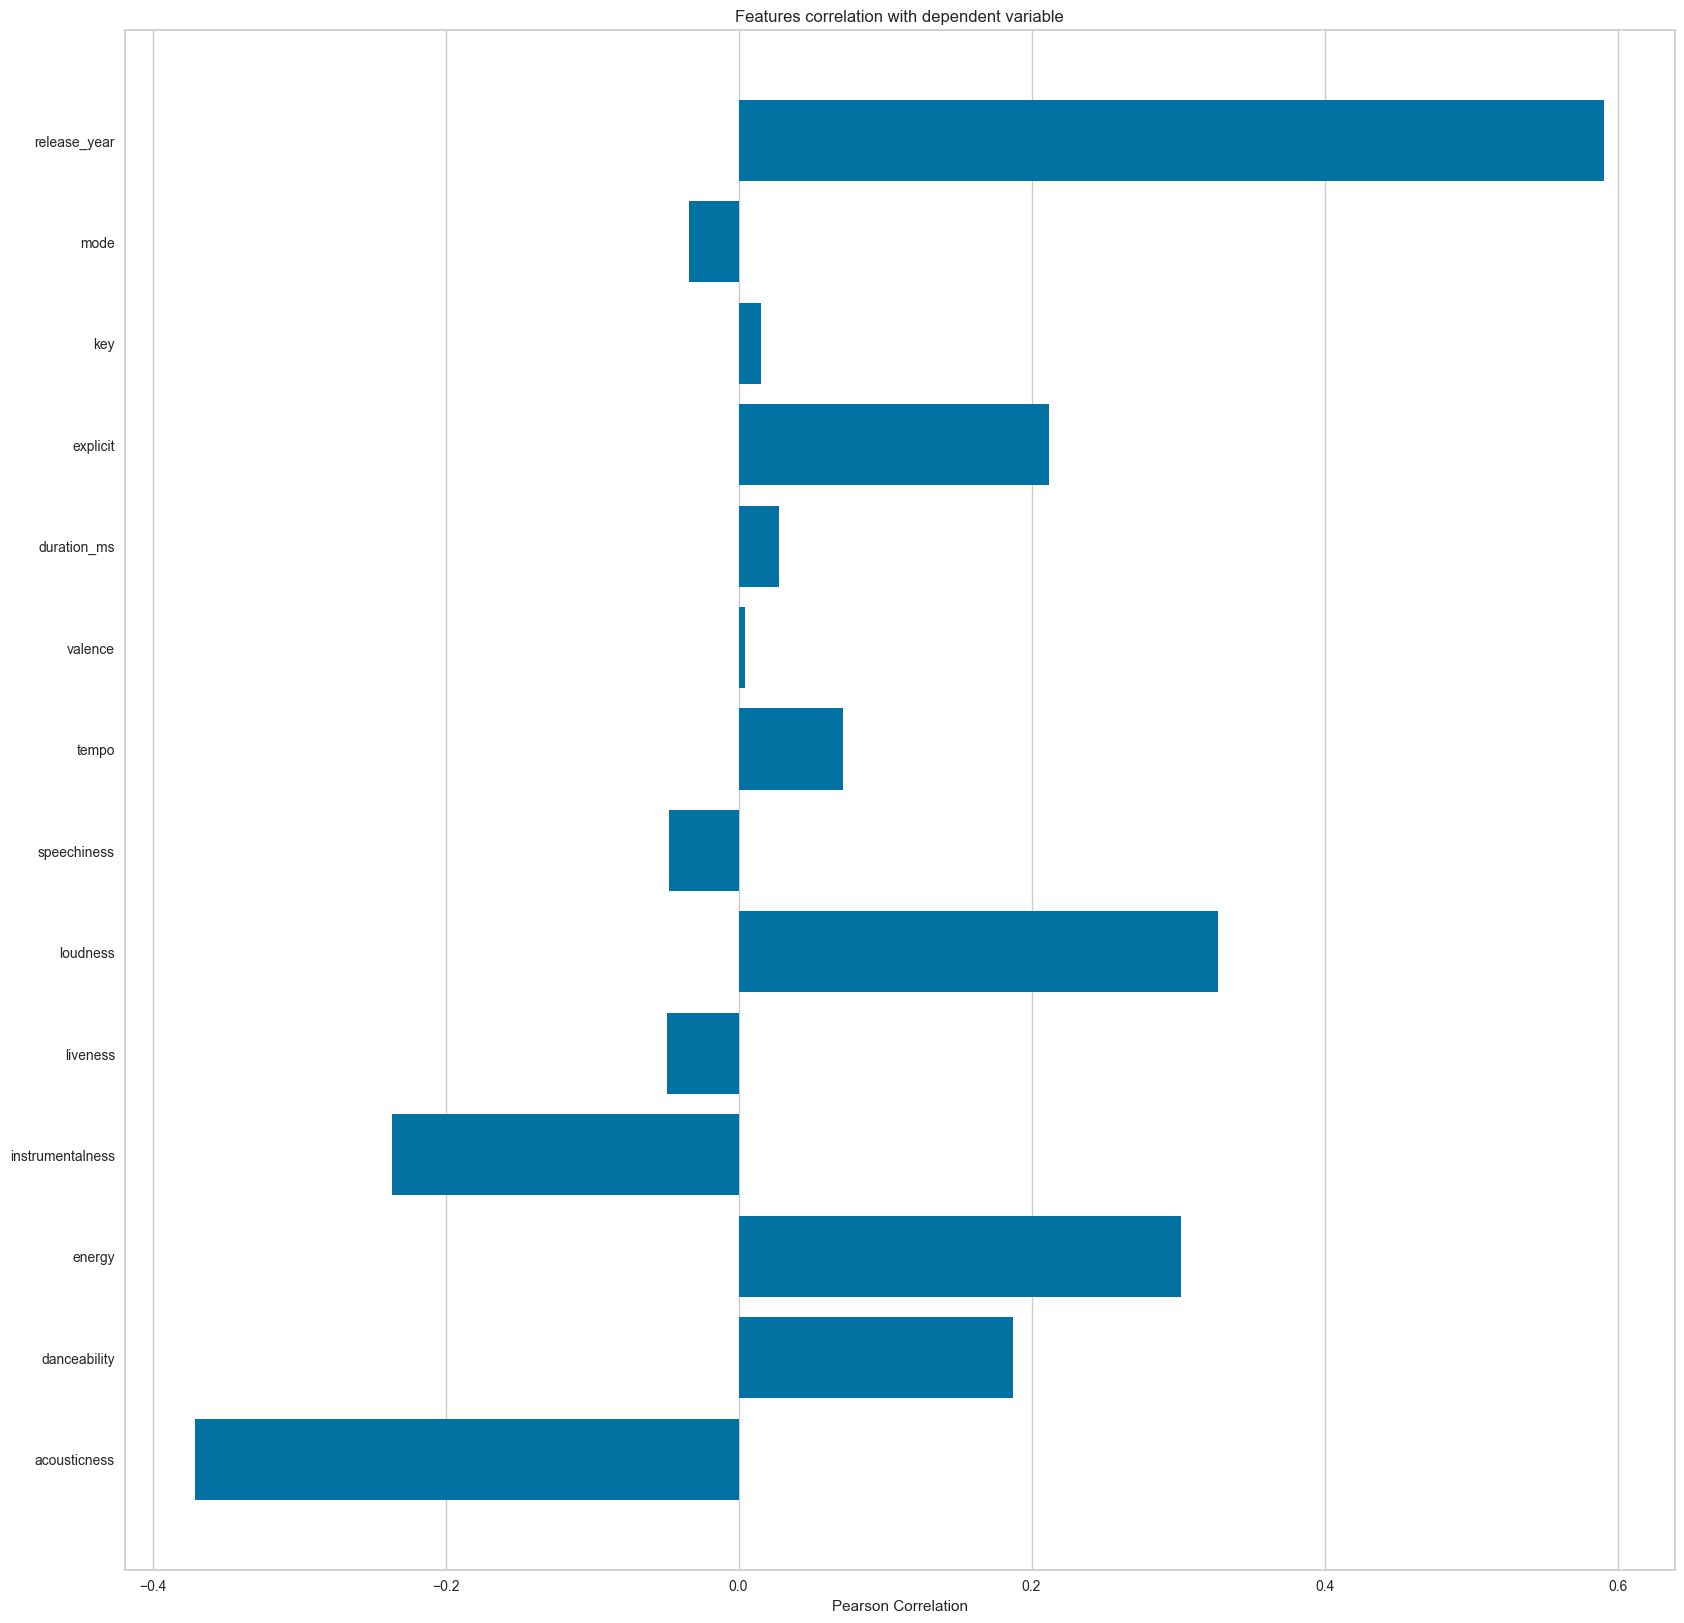

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode', 'release_year']

X, y = spotify_df[feature_names], spotify_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<Axes: xlabel='decade', ylabel='count'>

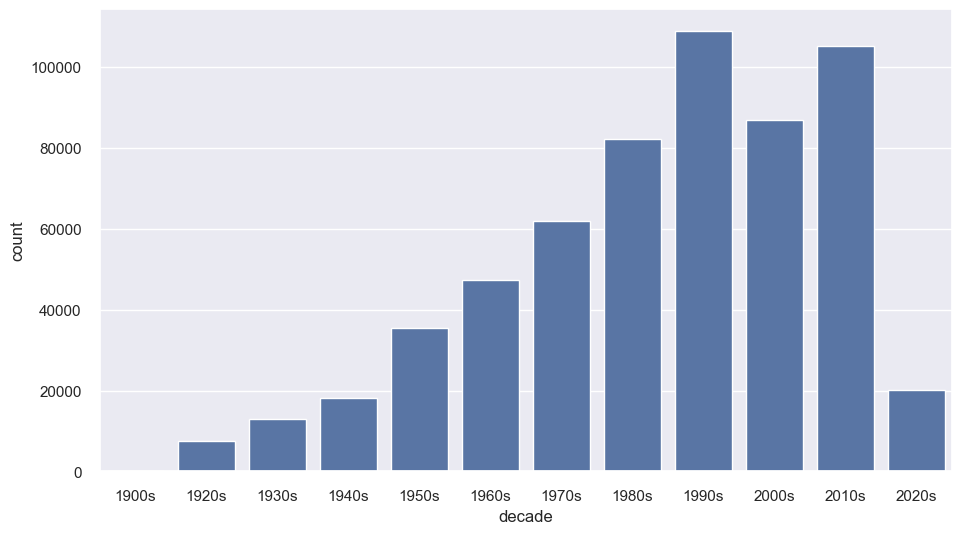

In [72]:
def get_decade(year):
    period_start = int(year / 10) * 10
    decade = '{}s'.format(period_start)
    return decade

spotify_normalized_df['decade'] = spotify_normalized_df['release_year'].apply(get_decade)
sorted_decades = sorted(spotify_normalized_df['decade'].unique())
spotify_normalized_df['decade'] = pd.Categorical(spotify_normalized_df['decade'], categories=sorted_decades, ordered=True)

sns.set_theme(rc={'figure.figsize': (11, 6)})
sns.countplot(data=spotify_normalized_df, x='decade', order=sorted_decades)

In [75]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
year_data = spotify_normalized_df.groupby('release_year')[sound_features].mean().reset_index()

fig = px.line(year_data, x='release_year', y=sound_features, 
              labels={'release_year': 'Year', 'value': 'Feature Value'}, 
              title='Trend of Sound Features Over Time')

fig.show()

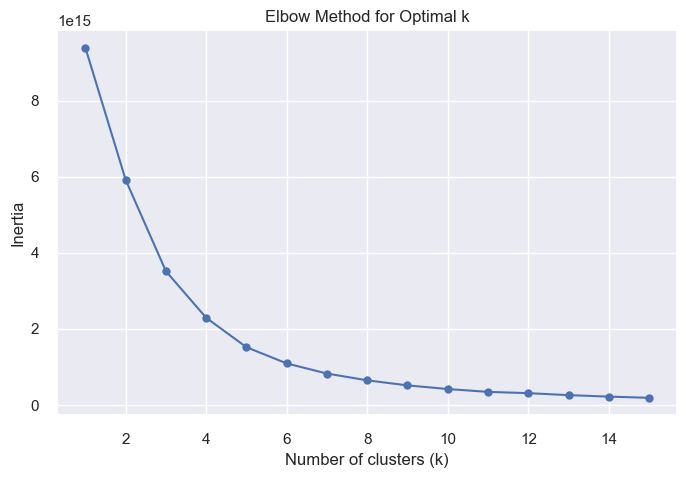

In [ ]:
# K-Means Clustering
clustering_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode', 'release_year']
X = spotify_normalized_df[clustering_features]

# Elbow method to see best amount of clusters
inertia = []
K = range(1, 16)  # test sizes 1-15

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# going to use k = 5


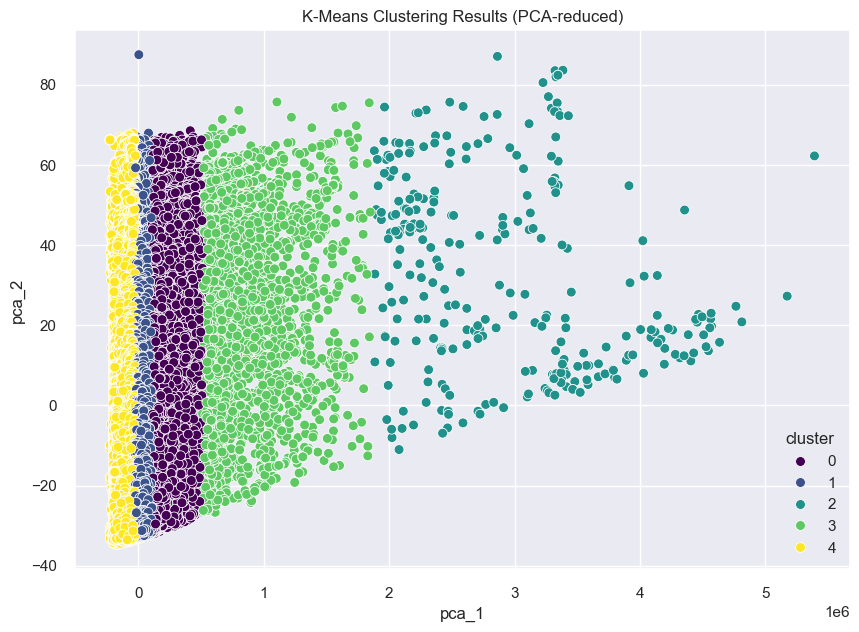

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spotify_normalized_df['cluster'] = kmeans.fit_predict(X)

# rec dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

spotify_normalized_df['pca_1'] = X_pca[:, 0]
spotify_normalized_df['pca_2'] = X_pca[:, 1]

# plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=spotify_normalized_df, x='pca_1', y='pca_2', hue='cluster', palette='viridis', s=50)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.show()

In [112]:
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
from dotenv import load_dotenv
import os


load_dotenv()
SPOTIFY_CLIENT_ID = os.getenv("SPOTIFY_CLIENT_ID")
SPOTIFY_CLIENT_SECRET = os.getenv("SPOTIFY_CLIENT_SECRET")

sp = Spotify(auth_manager=SpotifyOAuth(
    client_id=SPOTIFY_CLIENT_ID,
    client_secret=SPOTIFY_CLIENT_SECRET,
    redirect_uri="http://localhost:8888/callback",
    scope="playlist-read-private playlist-read-collaborative"
))

In [114]:
#https://open.spotify.com/playlist/0c5rv9i3Eu3mqO0GFk3JJC?si=b718d34dc4ba4b65
playlist_id = '0c5rv9i3Eu3mqO0GFk3JJC'
playlist_tracks = get_playlist_tracks(playlist_id)

for track in playlist_tracks[:5]:  # Print the first 5 tracks
    print(track)


OSError: [Errno 48] Address already in use

In [110]:
# # Function to fetch playlist tracks
# def get_playlist_tracks(playlist_id):
#     playlist_data = sp.playlist_tracks(playlist_id)
#     tracks = playlist_data['items']
#     while playlist_data['next']:
#         playlist_data = sp.next(playlist_data)
#         tracks.extend(playlist_data['items'])
    
#     # Extract track details
#     song_list = []
#     for track in tracks:
#         track_info = track['track']
#         song = {
#             'name': track_info['name'],
#             'year': int(track_info['album']['release_date'][:4]),
#             'artists': ', '.join([artist['name'] for artist in track_info['artists']]),
#             'id': track_info['id']  # Spotify track ID
#         }
#         song_list.append(song)
#     return song_list

# # Example usage: https://open.spotify.com/playlist/1aRVHcrkoX57qJF09wTime?si=0739e43ad5f94d43
# playlist_id = '1aRVHcrkoX57qJF09wTime'  # Replace with your playlist ID
# playlist_tracks = get_playlist_tracks(playlist_id)
# print(playlist_tracks)


In [105]:
def get_audio_features(song_list):
    features = []
    for song in song_list:
        if song['id']:
            audio_features = sp.audio_features(song['id'])[0]
            if audio_features:
                features.append({**song, **audio_features})
    return pd.DataFrame(features)

# Get audio features for the playlist
playlist_df = get_audio_features(playlist_tracks)
print(playlist_df.head())


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0Ftrkz2waaHcjKb4qYvLmz with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=0Ftrkz2waaHcjKb4qYvLmz:
 None, reason: None

In [98]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode', 'year']
playlist_df[clustering_features] = scaler.fit_transform(playlist_df[clustering_features])

NameError: name 'playlist_df' is not defined